*Page and Latex Commands*
$\newcommand{\C}{\mathbb{C}}
\renewcommand{\R}{\mathbb{R}}
\renewcommand{\Z}{\mathbb{Z}}
\renewcommand{\N}{\mathbb{N}}
\newcommand{\Q}{\mathbb{Q}}
\newcommand{\mP}{\mathcal{P}}
\newcommand{\bp}{\begin{pmatrix}}
\newcommand{\ep}{\end{pmatrix}}
$

In [2]:
#!jt -t gruvboxd

from jupyterthemes import jtplot
jtplot.style()

# Hide Warnings
import warnings
warnings.filterwarnings('ignore')

# Import Packages
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

BC = ["Dirichlet","Mixed","Neumann"]

# FDM 1D

## First Derivative Approximations

In [3]:
def D1FE(N, bc="Dirichlet", matrix  = False):
    if bc == "Dirichlet":
        d = [-1]*N
        dp = [0]+[1]*(N-2)
        dm = [0]*(N-1)
    elif bc == "Mixed":
        d = [-1]*(N-1)+[1]
        dp = [0]+[1]*(N-2)
        dm = [0]*(N-2)+[-1]
    elif bc == "Neumann":
        d = [-1]*(N-1)+[1]
        dp = [1]*(N-1)
        dm = [0]*(N-2)+[-1]
    else: raise ValueError('Unknown boundary condition. Try: Dirichlet, Mixed, Neumann')
        
    if matrix:
        return np.diag(d)+np.diag(dp,1)+np.diag(dm,-1)
    return dm,d,dp

for bc in BC:

    print("Forward Euler {}:\n {}".format(bc,D1FE(4, bc, matrix=True)))

Forward Euler Dirichlet:
 [[-1  0  0  0]
 [ 0 -1  1  0]
 [ 0  0 -1  1]
 [ 0  0  0 -1]]
Forward Euler Mixed:
 [[-1  0  0  0]
 [ 0 -1  1  0]
 [ 0  0 -1  1]
 [ 0  0 -1  1]]
Forward Euler Neumann:
 [[-1  1  0  0]
 [ 0 -1  1  0]
 [ 0  0 -1  1]
 [ 0  0 -1  1]]


In [4]:
def D1BE(N, bc = "Dirichlet", matrix  = False):
    if bc == "Dirichlet":
        d = [1]*(N-1)+[1]
        dp = [0]*(N-1)
        dm = [-1]*(N-2)+[0]
    elif bc == "Mixed":
        d = [1]*(N-1)+[1]
        dp = [0]*(N-1)
        dm = [-1]*(N-1)
    elif bc == "Neumann":
        d = [-1]+[1]*(N-1)
        dp = [1]+[0]*(N-2)
        dm = [-1]*(N-1)
    else: raise ValueError('Unknown boundary condition. Try: Dirichlet, Mixed, Neumann')
        
    if matrix:
        return np.diag(d)+np.diag(dp,1)+np.diag(dm,-1)
    return dm,d,dp

for bc in BC:
    print("Backward Euler {}:\n {}".format(bc,D1BE(4, bc,matrix=True)))

Backward Euler Dirichlet:
 [[ 1  0  0  0]
 [-1  1  0  0]
 [ 0 -1  1  0]
 [ 0  0  0  1]]
Backward Euler Mixed:
 [[ 1  0  0  0]
 [-1  1  0  0]
 [ 0 -1  1  0]
 [ 0  0 -1  1]]
Backward Euler Neumann:
 [[-1  1  0  0]
 [-1  1  0  0]
 [ 0 -1  1  0]
 [ 0  0 -1  1]]


In [5]:
def D1CD(N, bc="Dirichlet", matrix  = False):
        
    if bc == "Dirichlet":
        d = [2]+[0]*(N-2)+[2]
        dp = [0]+[1]*(N-2)
        dm = [-1]*(N-2)+[0]
    elif bc == "Mixed":
        d = [2]+[0]*(N-2)+[2]
        dp = [0]+[1]*(N-2)
        dm = [-1]*(N-2)+[-2]
    elif bc == "Neumann":
        d = [-2]+[0]*(N-2)+[2]
        dp = [2]+[1]*(N-2)
        dm = [-1]*(N-2)+[-2]
    else: raise ValueError('Unknown boundary condition. Try: Dirichlet, Mixed, Neumann')
        
    if matrix:
        return np.diag(d)+np.diag(dp,1)+np.diag(dm,-1)
    return dm,d,dp

for bc in BC:

    print("Centered Difference {}:\n {}".format(bc,D1CD(4, bc,matrix=True)))

Centered Difference Dirichlet:
 [[ 2  0  0  0]
 [-1  0  1  0]
 [ 0 -1  0  1]
 [ 0  0  0  2]]
Centered Difference Mixed:
 [[ 2  0  0  0]
 [-1  0  1  0]
 [ 0 -1  0  1]
 [ 0  0 -2  2]]
Centered Difference Neumann:
 [[-2  2  0  0]
 [-1  0  1  0]
 [ 0 -1  0  1]
 [ 0  0 -2  2]]


## Second Derivative Approximations

In [6]:
def DD1CD(N,bc="Dirichlet", matrix  = False):
    if bc == "Dirichlet":
        d = [1]+[-2]*(N-2)+[1]
        dp = [0]+[1]*(N-2)
        dm = [1]*(N-2)+[0]
    elif bc == "Mixed":
        d = [1]+[-2]*(N-1)
        dp = [0]+[1]*(N-2)
        dm = [1]*(N-1)
    elif bc == "Neumann":
        d = [-2]*N
        dp = [1]*(N-1)
        dm = [1]*(N-1)
    else: raise ValueError('Unknown boundary condition. Try: Dirichlet, Mixed, Neumann')
        
    if matrix:
        return np.diag(d)+np.diag(dp,1)+np.diag(dm,-1)
    return dm,d,dp

for bc in BC:

    print("Second Centered Difference {}:\n {}".format(bc,DD1CD(4, bc,matrix=True)))

Second Centered Difference Dirichlet:
 [[ 1  0  0  0]
 [ 1 -2  1  0]
 [ 0  1 -2  1]
 [ 0  0  0  1]]
Second Centered Difference Mixed:
 [[ 1  0  0  0]
 [ 1 -2  1  0]
 [ 0  1 -2  1]
 [ 0  0  1 -2]]
Second Centered Difference Neumann:
 [[-2  1  0  0]
 [ 1 -2  1  0]
 [ 0  1 -2  1]
 [ 0  0  1 -2]]


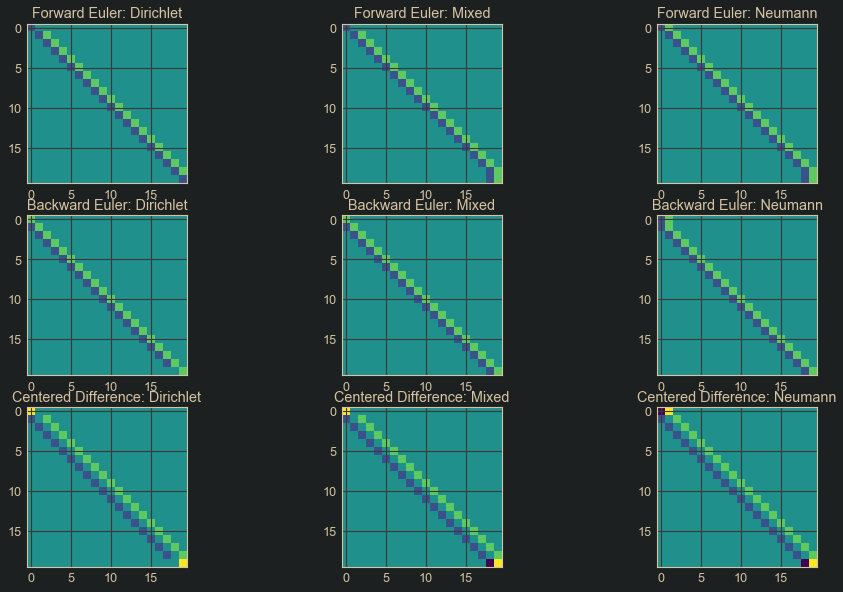

In [7]:
D1M = [D1FE, D1BE, D1CD]
D1S = ['Forward Euler', 'Backward Euler', 'Centered Difference']
plt.figure(figsize=(16,10))
plt.tight_layout()
for i,method in enumerate(D1M):
    for j,bc in enumerate(BC):
        plt.subplot(3,3,j+1+3*i)
        plt.imshow(method(20, bc ,matrix=True), vmin=-2, vmax=2)
        plt.title(D1S[i]+': '+bc)

# FDM 2D

## First Derivative Single Variable Approximations

### Differentiation in x

In [8]:
def D2xFE(N,M,bc="Dirichlet",matrix=False):
    if bc == "Dirichlet":
        d = ([1]+[-1]*(N-2)+[1])*M
        dp = (([0]+[1]*(N-2)+[0])*M)[:-1]
        dm = (([0]*N)*M)[:-1]
    elif bc == "Mixed":
        d = ([1]+[-1]*(N-2)+[1])*M
        dp = (([0]+[1]*(N-2)+[0])*M)[:-1]
        dm = (([0]*(N-2)+[-1]+[0])*M)[:-1]
    elif bc == "Neumann":
        d = ([-1]+[-1]*(N-2)+[1])*M
        dp = (([1]+[1]*(N-2)+[0])*M)[:-1]
        dm = (([0]*(N-2)+[-1]+[0])*M)[:-1]
    else: raise ValueError('Unknown boundary condition. Try: Dirichlet, Mixed, Neumann')

    if matrix:
        return np.diag(d)+np.diag(dp,1)+np.diag(dm,-1)
    return dm,d,dp

for bc in BC:
    
    print("Forward Difference {}:\n {}".format(bc,D2xFE(4,5, bc,matrix=True)))

Forward Difference Dirichlet:
 [[ 1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 -1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 -1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 -1  1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 -1  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 -1  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 -1  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 -1  1  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  1  0  0  0  0]
 [ 0  0  0  0  0  0  0  

In [9]:
def D2xBE(N,M,bc="Dirichlet",matrix=False):
    if bc == "Dirichlet":
        d = ([1]+[1]*(N-2)+[1])*M
        dp = (([0]+[0]*(N-2)+[0])*M)[:-1]
        dm = (([-1]*(N-2)+[0]+[0])*M)[:-1]
    elif bc == "Mixed":
        d = ([1]+[1]*(N-2)+[1])*M
        dp = (([0]+[0]*(N-2)+[0])*M)[:-1]
        dm = (([-1]*(N-2)+[-1]+[0])*M)[:-1]
    elif bc == "Neumann":
        d = ([-1]+[-1]*(N-2)+[1])*M
        dp = (([1]+[1]*(N-2)+[0])*M)[:-1]
        dm = (([0]*(N-2)+[-1]+[0])*M)[:-1]
    else: raise ValueError('Unknown boundary condition. Try: Dirichlet, Mixed, Neumann')

    if matrix:
        return np.diag(d)+np.diag(dp,1)+np.diag(dm,-1)
    return dm,d,dp

for bc in BC:
    
    print("Backward Difference {}:\n {}".format(bc,D2xBE(4,5, bc,matrix=True)))

Backward Difference Dirichlet:
 [[ 1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [-1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 -1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 -1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 -1  1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 -1  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 -1  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 -1  1  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 -1  1  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 

In [10]:
def D2xCD(N,M,bc="Dirichlet",matrix=False):
    if bc == "Dirichlet":
        d = ([2]+[0]*(N-2)+[2])*M
        dp = (([0]+[1]*(N-2)+[0])*M)[:-1]
        dm = (([-1]*(N-2)+[0]+[0])*M)[:-1]
    elif bc == "Mixed":
        d = ([2]+[0]*(N-2)+[2])*M
        dp = (([0]+[1]*(N-2)+[0])*M)[:-1]
        dm = (([-1]*(N-2)+[-2]+[0])*M)[:-1]
    elif bc == "Neumann":
        d = ([-2]+[0]*(N-2)+[2])*M
        dp = (([2]+[1]*(N-2)+[0])*M)[:-1]
        dm = (([-1]*(N-2)+[-2]+[0])*M)[:-1]
    else: raise ValueError('Unknown boundary condition. Try: Dirichlet, Mixed, Neumann')

    if matrix:
        return .5*(np.diag(d)+np.diag(dp,1)+np.diag(dm,-1))
    return .5*dm,.5*d,.5*dp

for bc in BC:
    
    print("Centerred Difference {}:\n {}".format(bc,D2xCD(4,5, bc,matrix=True)))

Centerred Difference Dirichlet:
 [[ 1.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0. ]
 [-0.5  0.   0.5  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0. ]
 [ 0.  -0.5  0.   0.5  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0. ]
 [ 0.   0.   0.   1.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0. ]
 [ 0.   0.   0.   0.   1.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0. ]
 [ 0.   0.   0.   0.  -0.5  0.   0.5  0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0. ]
 [ 0.   0.   0.   0.   0.  -0.5  0.   0.5  0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0. ]
 [ 0.   0.   0.   0.   0.   0.   0.   1.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0. ]
 [ 0.   0.   0.   0.   0.   0.   0.   0.   1.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0. ]
 [ 0.   0.   0.   0.   0.   0. 

### Differentiation in y

In [11]:
def D2yFE(N,M,bc="Dirichlet",matrix=False):
    if bc == "Dirichlet":
        d = [1]*(N)+([-1]*(M-2))*(N)+[1]*(N)
        dp = ([0]*(N)+([1]*(M-2)*(N)))
        dm = ([0]*(N)+([0]*(M-2)*(N)))
    elif bc == "Mixed":
        d = [1]*(N)+([-1]*(M-2))*(N)+[1]*(N)
        dp = ([0]*(N)+([1]*(M-2)*(N)))
        dm = ([0]*(M-2)*(N))+[-1]*(N)
    elif bc == "Neumann":
        d = [-1]*(N)+([-1]*(M-2))*(N)+[1]*(N)
        dp = ([1]*(N)+([1]*(M-2)*(N)))
        dm = ([0]*(M-2)*(N))+[-1]*(N)
    else: raise ValueError('Unknown boundary condition. Try: Dirichlet, Mixed, Neumann')

    if matrix:
        return np.diag(d)+np.diag(dp,N)+np.diag(dm,-N)
    return dm,d,dp

for bc in BC:
    
    print("Forward Difference {}:\n {}".format(bc,D2yFE(4,5, bc,matrix=True)))
    
D2yFE(4,5, bc,matrix=True).shape

Forward Difference Dirichlet:
 [[ 1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 -1  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 -1  0  0  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 -1  0  0  0  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 -1  0  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 -1  0  0  0  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 -1  0  0  0  1  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 -1  0  0  0  1  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  1  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  1  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  1  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  1  0]
 [ 0  0  0  0  0  0  0  

(20, 20)

In [12]:
def D2yBE(N,M,bc="Dirichlet",matrix=False):
    if bc == "Dirichlet":
        d = [1]*(N)+([1]*(M-2))*(N)+[1]*(N)
        dp = ([0]*(N)+([0]*(M-2)*(N)))
        dm = ([-1]*(M-2)*(N))+[0]*(N)
    elif bc == "Mixed":
        d = [1]*(N)+([1]*(M-2))*(N)+[1]*(N)
        dp = ([0]*(N)+([0]*(M-2)*(N)))
        dm = ([-1]*(M-2)*(N))+[-1]*(N)
    elif bc == "Neumann":
        d = [-1]*(N)+([1]*(M-2))*(N)+[1]*(N)
        dp = ([1]*(N)+([0]*(M-2)*(N)))
        dm = ([-1]*(M-2)*(N))+[-1]*(N)
    else: raise ValueError('Unknown boundary condition. Try: Dirichlet, Mixed, Neumann')

    if matrix:
        return np.diag(d)+np.diag(dp,N)+np.diag(dm,-N)
    return dm,d,dp

for bc in BC:
    
    print("Backward Difference {}:\n {}".format(bc,D2yBE(4,5, bc,matrix=True)))

Backward Difference Dirichlet:
 [[ 1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [-1  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 -1  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 -1  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 -1  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 -1  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 -1  0  0  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 -1  0  0  0  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 -1  0  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 -1  0  0  0  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 -1  0  0  0  1  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 -1  0  0  0  1  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 

In [13]:
def D2yCD(N,M,bc="Dirichlet",matrix=False):
    if bc == "Dirichlet":
        d = [2]*(N)+([0]*(M-2))*(N)+[2]*(N)
        dp = ([0]*(N)+([1]*(M-2)*(N)))
        dm = ([-1]*(M-2)*(N))+[0]*(N)
    elif bc == "Mixed":
        d = [2]*(N)+([0]*(M-2))*(N)+[2]*(N)
        dp = ([0]*(N)+([1]*(M-2)*(N)))
        dm = ([-1]*(M-2)*(N))+[-2]*(N)
    elif bc == "Neumann":
        d = [-2]*(N)+([0]*(M-2))*(N)+[2]*(N)
        dp = ([2]*(N)+([1]*(M-2)*(N)))
        dm = ([-1]*(M-2)*(N))+[-2]*(N)
    else: raise ValueError('Unknown boundary condition. Try: Dirichlet, Mixed, Neumann')

    if matrix:
        return .5*(np.diag(d)+np.diag(dp,N)+np.diag(dm,-N))
    return .5*dm,.5*d,.5*dp

for bc in BC:
    
    print("Centerred Difference {}:\n {}".format(bc,D2yCD(4,5, bc,matrix=True)))

Centerred Difference Dirichlet:
 [[ 1.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0. ]
 [ 0.   1.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0. ]
 [ 0.   0.   1.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0. ]
 [ 0.   0.   0.   1.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0. ]
 [-0.5  0.   0.   0.   0.   0.   0.   0.   0.5  0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0. ]
 [ 0.  -0.5  0.   0.   0.   0.   0.   0.   0.   0.5  0.   0.   0.   0.
   0.   0.   0.   0.   0.   0. ]
 [ 0.   0.  -0.5  0.   0.   0.   0.   0.   0.   0.   0.5  0.   0.   0.
   0.   0.   0.   0.   0.   0. ]
 [ 0.   0.   0.  -0.5  0.   0.   0.   0.   0.   0.   0.   0.5  0.   0.
   0.   0.   0.   0.   0.   0. ]
 [ 0.   0.   0.   0.  -0.5  0.   0.   0.   0.   0.   0.   0.   0.5  0.
   0.   0.   0.   0.   0.   0. ]
 [ 0.   0.   0.   0.   0.  -0.5

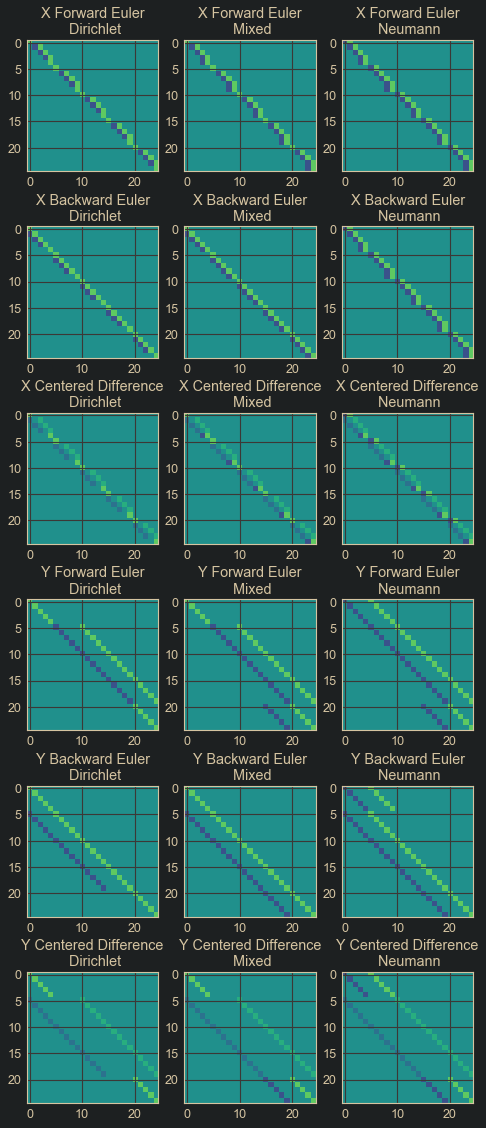

In [14]:
D2M = [D2xFE, D2xBE, D2xCD, D2yFE, D2yBE, D2yCD]
D2S = ['X Forward Euler', 'X Backward Euler', 'X Centered Difference','Y Forward Euler', 'Y Backward Euler', 'Y Centered Difference']
plt.figure(figsize=(8,20))
plt.tight_layout()
for i,method in enumerate(D2M):
    for j,bc in enumerate(BC):
        plt.subplot(6,3,j+1+3*i)
        plt.imshow(method(5, 5, bc ,matrix=True), vmin=-2, vmax=2)
        plt.title(D2S[i]+'\n '+bc)

## Laplace Operator

### Constant Coefficient Elliptic

In [15]:
def DD2P5(N,M,bc = "Dirichlet", matrix=False):
    if bc == "Dirichlet":
        d = [-4]*N*M
        dp = (([1]*(N-1)+[0])*M)[:-1]
        dpp = ([1]*N*(M-1))
        dm = (([1]*(N-1)+[0])*M)[:-1]
        dmm = ([1]*N*(M-1))  
    elif bc == "Mixed":
        d = ([-3]+[-4]*(N-2)+[-3])+([-4]+[-4]*(N-2)+[-4])*(M-2)+([-3]+[-4]*(N-2)+[-3])
        dp = (([1]*(N-1)+[0])*M)[:-1]
        dpp = ([1]*N*(M-1))
        dm = (([1]*(N-1)+[0])*M)[:-1]
        dmm = ([1]*N*(M-1))  
    elif bc == "Neumann":
        d = ([-2]+[-3]*(N-2)+[-2])+([-3]+[-4]*(N-2)+[-3])*(M-2)+([-2]+[-3]*(N-2)+[-2])
        dp = (([1]*(N-1)+[0])*M)[:-1]
        dpp = ([1]*N*(M-1))
        dm = (([1]*(N-1)+[0])*M)[:-1]
        dmm = ([1]*N*(M-1))  
    else: raise ValueError('Unknown boundary condition. Try: Dirichlet, Mixed, Neumann')
    
    
    if matrix:
        return np.diag(d)+np.diag(dp,1)+np.diag(dm,-1)+np.diag(dpp,N)+np.diag(dmm,-N)
    return dm,d,dp

for bc in BC:

    print("5 Point Poisson {}:\n {}".format(bc,DD2P5(4,5,bc,matrix=True)))

5 Point Poisson Dirichlet:
 [[-4  1  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1 -4  1  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1 -4  1  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1 -4  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0 -4  1  0  0  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  0  0  1 -4  1  0  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  1 -4  1  0  0  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  0  0  1 -4  0  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  0  0 -4  1  0  0  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  1 -4  1  0  0  1  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  1 -4  1  0  0  1  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  1  0  0  1 -4  0  0  0  1  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  1  0  0  0 -4  1  0  0  1  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  1  0  0  1 -4  1  0  0  1  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  1  0  0  1 -4  1  0  0  1  0]
 [ 0  0  0  0  0  0  0  0  

### Variable Coefficient Elliptic - Arithmetic Mean

In [16]:
def VP2A(n,m,lam):

    d = [1]*n*m
    dy = ([1]*(n))*(m-1)
    dx = (([1]*(n-1)+[0])*m)[:-1]
    dz = (([1]*(n-1)+[0])*(m-1))[:-1]
    
    A0 = np.diag(d)+np.diag(dy,-m)+np.diag(dx,-1)+np.diag(dz,-m-1)
    A1 = .5*(np.diag(d)+np.diag(dy,-m))
    A2 = .5*(np.diag(d)+np.diag(dx,-1))
    A3 = .5*(np.diag(dx,-1)+np.diag(dz,-m-1))
    A4 = .5*(np.diag(dy,-m)+np.diag(dz,-m-1))

    a0 = (A0@lam).reshape((n,m))[1:,1:].flatten()
    a1 = (A1@lam).reshape((n,m))[1:,1:].flatten()[1:]
    a2 = (A2@lam).reshape((n,m))[1:,1:].flatten()[m-1:]
    a3 = (A3@lam).reshape((n,m))[1:,1:].flatten()[:-1]
    a4 = (A4@lam).reshape((n,m))[1:,1:].flatten()[:-m+1]

    for i in range(m-2):
        a1[(m-2)+i*(n-1)]=0
        a3[(m-2)+i*(n-1)]=0

    return -np.diag(a0)+np.diag(a1,1)+np.diag(a2,m-1)+np.diag(a3,-1)+np.diag(a4,-m+1)

print(VP2A(5,5,np.ones(25)))

[[-4.  1.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1. -4.  1.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1. -4.  1.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1. -4.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0. -4.  1.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  1. -4.  1.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  1. -4.  1.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  1. -4.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0. -4.  1.  0.  0.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.  1. -4.  1.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.  0.  1. -4.  1.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  1. -4.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0. -4.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  1. -4.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  1. -4. 

### Variable Coefficient Elliptic - Harmonic Mean

In [22]:
def VP2H(n,m,lam):

    lam = np.power(lam,-1)

    d = [1]*n*m
    dy = ([1]*(n))*(m-1)
    dx = (([1]*(n-1)+[0])*m)[:-1]
    dz = (([1]*(n-1)+[0])*(m-1))[:-1]
    
    A0 = np.diag(d)+np.diag(dy,-m)+np.diag(dx,-1)+np.diag(dz,-m-1)
    A1 = .5*(np.diag(d)+np.diag(dy,-m))
    A2 = .5*(np.diag(d)+np.diag(dx,-1))
    A3 = .5*(np.diag(dx,-1)+np.diag(dz,-m-1))
    A4 = .5*(np.diag(dy,-m)+np.diag(dz,-m-1))

    a0 = (A0@lam).reshape((n,m))[1:,1:].flatten()
    a1 = (A1@lam).reshape((n,m))[1:,1:].flatten()[1:]
    a2 = (A2@lam).reshape((n,m))[1:,1:].flatten()[m-1:]
    a3 = (A3@lam).reshape((n,m))[1:,1:].flatten()[:-1]
    a4 = (A4@lam).reshape((n,m))[1:,1:].flatten()[:-m+1]

    for i in range(m-2):
        a1[(m-2)+i*(n-1)]=0
        a3[(m-2)+i*(n-1)]=0

    return -np.diag(a0)+np.diag(a1,1)+np.diag(a2,m-1)+np.diag(a3,-1)+np.diag(a4,-m+1)

print(VP2H(5,5,.5*np.ones(25)))

[[-8.  2.  0.  0.  2.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 2. -8.  2.  0.  0.  2.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  2. -8.  2.  0.  0.  2.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  2. -8.  0.  0.  0.  2.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 2.  0.  0.  0. -8.  2.  0.  0.  2.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  2.  0.  0.  2. -8.  2.  0.  0.  2.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  2.  0.  0.  2. -8.  2.  0.  0.  2.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  2.  0.  0.  2. -8.  0.  0.  0.  2.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  2.  0.  0.  0. -8.  2.  0.  0.  2.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  2.  0.  0.  2. -8.  2.  0.  0.  2.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  2.  0.  0.  2. -8.  2.  0.  0.  2.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  2.  0.  0.  2. -8.  0.  0.  0.  2.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  2.  0.  0.  0. -8.  2.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  2.  0.  0.  2. -8.  2.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  2.  0.  0.  2. -8. 

# SM

## Foureir Transforms

# Examples

## One Dimensional

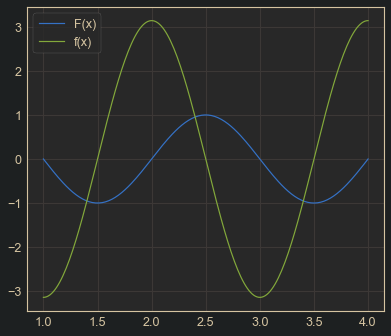

In [ ]:
N=200
F = lambda x : np.sin(np.pi*x)
f = lambda x : np.pi*np.cos(np.pi*x)
x=np.linspace(1,4,N)
plt.plot(x,F(x),label='F(x)')
plt.plot(x,f(x),label='f(x)')
plt.legend()

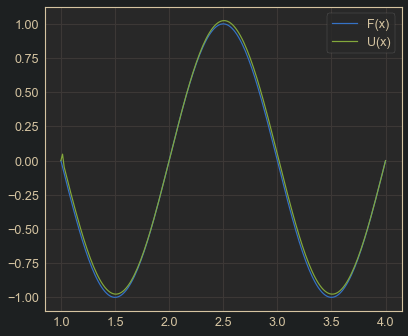

In [ ]:
U = np.linalg.solve(D1FE(N-2,matrix=True),(x[1]-x[0])*f(x[1:-1]))
plt.plot(x,F(x),label='F(x)')
plt.plot(x,[F(x[0])]+list(U)+[F(x[-1])],label='U(x)')
plt.legend()

**Backward Difference**

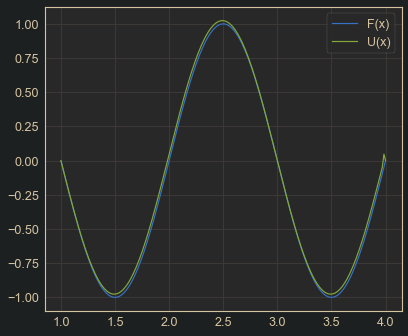

In [ ]:
U = np.linalg.solve(D1BE(N-2,matrix=True),(x[1]-x[0])*f(x[1:-1]))
plt.plot(x,F(x),label='F(x)')
plt.plot(x,[F(x[0])]+list(U)+[F(x[-1])],label='U(x)')
plt.legend()

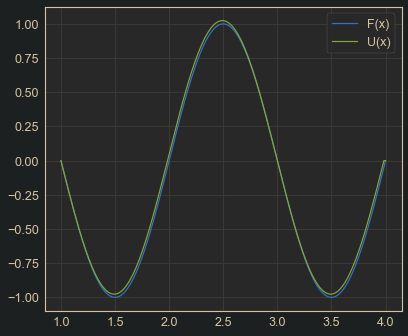

In [ ]:
U = np.linalg.lstsq(D1BE(N-1,bc="Mixed",matrix=True)[:-1],(x[1]-x[0])*(f(x[1:-1])))
plt.plot(x,F(x),label='F(x)')
plt.plot(x,[F(x[0])]+list(U[0]),label='U(x)')
plt.legend()

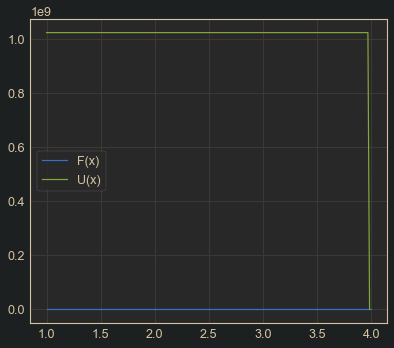

In [ ]:
U = np.linalg.lstsq(D1BE(N-1,bc="Neumann",matrix=True)[:-1],(x[1]-x[0])*(f(x[1:-1])))
plt.plot(x,F(x),label='F(x)')
plt.plot(x[:-1],list(U[0]),label='U(x)')
plt.legend()

**Centered Difference**

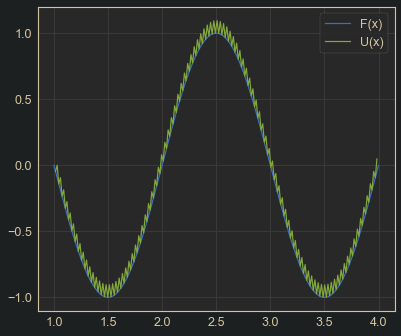

In [ ]:
U = np.linalg.solve(D1CD(N-2,matrix=True),(x[1]-x[0])*2*f(x[1:-1]))
plt.plot(x,F(x),label='F(x)')
plt.plot(x[1:-1],list(U),label='U(x)')
plt.legend()

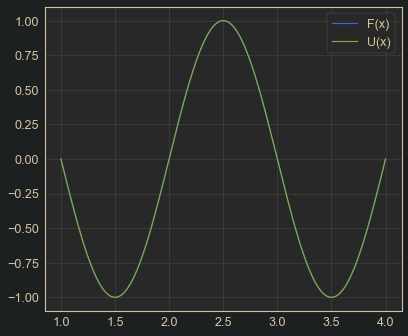

In [ ]:
U = np.linalg.lstsq(D1CD(N-1,bc="Mixed",matrix=True),(x[1]-x[0])*2*(f(x[1:])))
plt.plot(x,F(x),label='F(x)')
plt.plot(x,[F(x[0])]+list(U[0]),label='U(x)')
plt.legend()

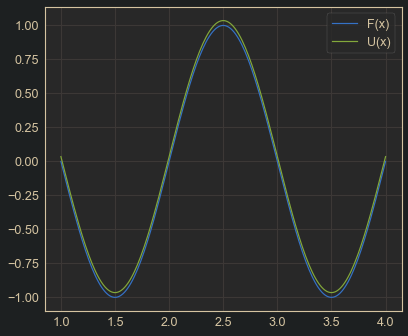

In [ ]:
U = np.linalg.lstsq(D1CD(N,bc="Neumann",matrix=True),(x[1]-x[0])*2*(f(x)))
plt.plot(x,F(x),label='F(x)')
plt.plot(x,list(U[0]),label='U(x)')
plt.legend()

## Two Dimensional

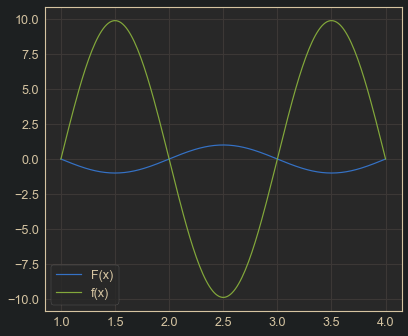

In [ ]:
N=200
x=np.linspace(1,4,N)
h = x[1]-x[0]
F = lambda x : np.sin(np.pi*x)
f = lambda x : -np.pi**2*np.sin(np.pi*x)
plt.plot(x,F(x),label='F(x)')
plt.plot(x,f(x),label='f(x)')
plt.legend()


### Centered


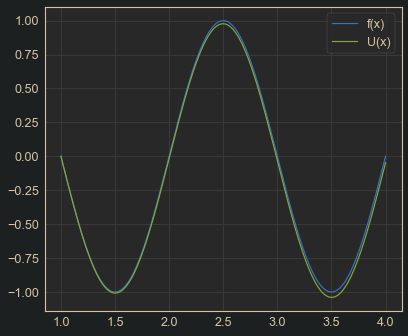

In [ ]:
U = np.linalg.lstsq(DD1CD(N,bc="Mixed",matrix=True),f(x)*h**2)
plt.plot(x,F(x),label='f(x)')
plt.plot(x,list(U[0]),label='U(x)')
plt.legend()

## Two Dimensional

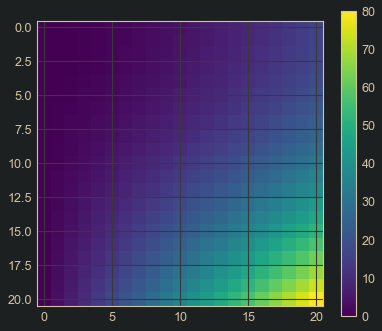

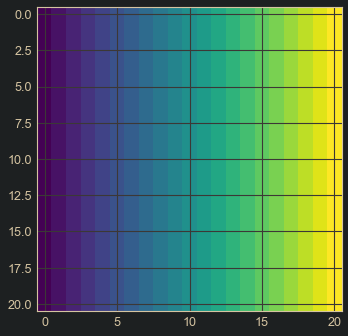

In [ ]:
f = lambda x, y : 2+2*x
F = lambda x, y : x**2 + x*y**2

N,M = 21,21
x = np.linspace(0,4,N)
y = np.linspace(0,4,M)
dx = 4/N
dy = 4/M

_xx, _yy = np.meshgrid(x, y)
x, y = _xx.ravel(), _yy.ravel()

U = F(x,y)

u = f(x,y)

plt.imshow(U.reshape(N,M))
plt.colorbar()
plt.figure()
plt.imshow(u.reshape(N,M))

Incorporate Boundary Conditions in the RHS

Text(0.5, 1.0, 'RHS')

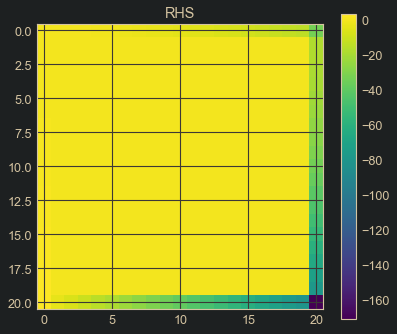

In [ ]:
rhb = np.zeros(N*M)
rhb[:N]=F(x[:N],y[:N]-dy)
lhb = np.zeros(N*M)
lhb[(N-1)*M:]=F(x[(N-1)*M:],y[(N-1)*M:]+dy)
lwb = np.zeros(N*M)
lwb[::N] = F(x[::N]-dx,y[::N])
upb = np.zeros(N*M)
upb[(N-1)::N]= F(x[(N-1)::N]+dx,y[(N-1)::N])

plt.imshow((dx*dy*u-rhb-lhb-lwb-upb).reshape(N,M))
plt.colorbar()
plt.title("RHS")

Solve for $U(x)$

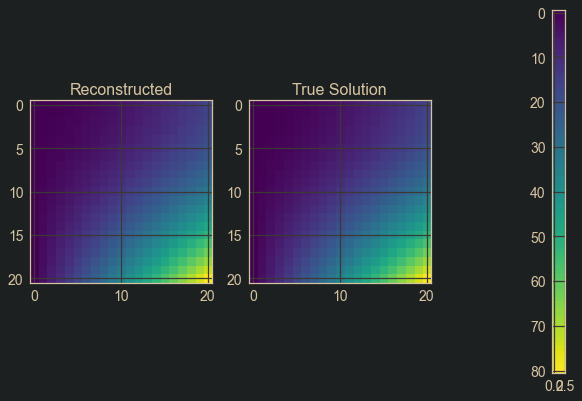

In [ ]:
Us = np.linalg.lstsq(DD2P5(N,M,bc="Dirichlet",matrix=True),dx*dy*u-rhb-lhb-lwb-upb)[0]
plt.figure(figsize=(10,6), dpi=80)
plt.subplot(131)
plt.imshow(Us.reshape(N,M), vmax=max(U), vmin=min(U))
plt.title('Reconstructed')
plt.subplot(132)
plt.imshow(U.reshape(N,M))
plt.title('True Solution')
c = np.array([np.arange(min(U), max(U)+1)]*3)
plt.subplot(133)
plt.imshow(c.T)
plt.show()

**FFT**

In [ ]:
k = (2*np.pi)*np.fft.fftfreq(N)
_kx, _ky = np.meshgrid(k,k)

div = -(_kx**2+_ky**2)
div[0,0]=1

### Poisson Equation

In [ ]:
def DD2P5(N,M,bc = "Dirichlet", matrix=False):
    if bc == "Dirichlet":
        d = [-4]*N*M
        dp = (([1]*(N-1)+[0])*M)[:-1]
        dpp = ([1]*N*(M-1))
        dm = (([1]*(N-1)+[0])*M)[:-1]
        dmm = ([1]*N*(M-1))  
    elif bc == "Mixed":
        d = ([-3]+[-4]*(N-2)+[-3])+([-4]+[-4]*(N-2)+[-4])*(M-2)+([-3]+[-4]*(N-2)+[-3])
        dp = (([1]*(N-1)+[0])*M)[:-1]
        dpp = ([1]*N*(M-1))
        dm = (([1]*(N-1)+[0])*M)[:-1]
        dmm = ([1]*N*(M-1))  
    elif bc == "Neumann":
        d = ([-2]+[-3]*(N-2)+[-2])+([-3]+[-4]*(N-2)+[-3])*(M-2)+([-2]+[-3]*(N-2)+[-2])
        dp = (([1]*(N-1)+[0])*M)[:-1]
        dpp = ([1]*N*(M-1))
        dm = (([1]*(N-1)+[0])*M)[:-1]
        dmm = ([1]*N*(M-1))  
    else: raise ValueError('Unknown boundary condition. Try: Dirichlet, Mixed, Neumann')
    
    
    if matrix:
        return np.diag(d)+np.diag(dp,1)+np.diag(dm,-1)+np.diag(dpp,N)+np.diag(dmm,-N)
    return dm,d,dp

for bc in BC:

    print("5 Point Poisson {}:\n {}".format(bc,DD2P5(4,5,bc,matrix=True)))

5 Point Poisson Dirichlet:
 [[-4  1  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1 -4  1  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1 -4  1  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1 -4  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0 -4  1  0  0  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  0  0  1 -4  1  0  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  1 -4  1  0  0  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  0  0  1 -4  0  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  0  0 -4  1  0  0  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  1 -4  1  0  0  1  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  1 -4  1  0  0  1  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  1  0  0  1 -4  0  0  0  1  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  1  0  0  0 -4  1  0  0  1  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  1  0  0  1 -4  1  0  0  1  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  1  0  0  1 -4  1  0  0  1  0]
 [ 0  0  0  0  0  0  0  0  

### Variable Coefficient Elliptic

In [ ]:
n = m = 5
xx,yy = np.meshgrid(np.linspace(0,1,n), np.linspace(0,1,m))

In [ ]:
lam = np.ones(n*m)

In [ ]:
d = [1]*n*m
dy = ([1]*(n))*(m-1)
dx = (([1]*(n-1)+[0])*m)[:-1]
dz = (([1]*(n-1)+[0])*(m-1))[:-1]

A0 = np.diag(d)+np.diag(dy,-m)+np.diag(dx,-1)+np.diag(dz,-m-1)
A1 = .5*(np.diag(d)+np.diag(dy,-m))
A2 = .5*(np.diag(d)+np.diag(dx,-1))
A3 = .5*(np.diag(dx,-1)+np.diag(dz,-m-1))
A4 = .5*(np.diag(dy,-m)+np.diag(dz,-m-1))

print(A0,'\n',A1,'\n',A2,'\n',A3,'\n',A4)

[[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 

In [ ]:
a0 = (A0@lam).reshape((n,m))[1:,1:].flatten()
a1 = (A1@lam).reshape((n,m))[1:,1:].flatten()[1:]
a2 = (A2@lam).reshape((n,m))[1:,1:].flatten()[m-1:]
a3 = (A3@lam).reshape((n,m))[1:,1:].flatten()[:-1]
a4 = (A4@lam).reshape((n,m))[1:,1:].flatten()[:-m+1]

for i in range(m-2):
    a1[(m-2)+i*(n-1)]=0
    a3[(m-2)+i*(n-1)]=0

print(a0,'\n',a1,'\n',a2,'\n',a3,'\n',a4)

[4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.] 
 [1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1.] 
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 
 [1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1.] 
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [ ]:
A = -np.diag(a0)+np.diag(a1,1)+np.diag(a2,m-1)+np.diag(a3,-1)+np.diag(a4,-m+1)
print(A)
print(DD2P5(4,4, matrix=True))

[[-4.  1.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1. -4.  1.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1. -4.  1.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1. -4.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0. -4.  1.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  1. -4.  1.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  1. -4.  1.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  1. -4.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0. -4.  1.  0.  0.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.  1. -4.  1.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.  0.  1. -4.  1.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  1. -4.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0. -4.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  1. -4.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  1. -4. 

In [ ]:
print(np.allclose(A.flatten(), DD2P5(4,4, matrix=True).flatten()))

True
